## Circular waveguide - Discussion

In [1]:
import os
import sys
import fenics as fen
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg

In [2]:
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('__file__')))))
from circular_waveguide import CircularWaveguide
import src.helpers as helpers

### Dimensions and properties

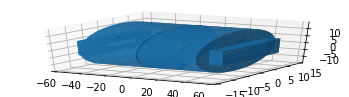

In [25]:
mesh = fen.Mesh('DMCWF.xml')
fen.plot(mesh)

Dx = 0.75 + 43.87 + 1.5 + 10
Dy = 10.05
Dz = 5

class B_N(fen.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and fen.near(abs(x[0]), Dx) and x[1]>-Dy and x[1]<Dy and x[2]>-Dz and x[2]<Dz

class g_N(fen.Expression):
    def eval(self, value, x):
        value[0] = 1.0 if fen.near(x[0], -Dx) else 0.0
        value[1] = 0.0
        value[2] = 0.0
    def value_shape(self):
        return (3,)

WG = CircularWaveguide(mesh, B_N, g_N=g_N)

### Solution of problem

In [14]:
WG.setup()
WG.solve(1.3)
WG.compute_solution_norm()

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to successfully call PETSc function 'KSPSolve'.
*** Reason:  PETSc error code is: 76 (Error in external library).
*** Where:   This error was encountered inside /tmp/dolfin/dolfin/la/PETScKrylovSolver.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  74d7efe1e84d65e9433fd96c50f1d278fa3e3f3f
*** -------------------------------------------------------------------------
